# Load Data

In [34]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import os

# Path to the ecommerce_data folder
data_folder = '/content/drive/My Drive/ecommerce_data'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load each dataset
amazon_data = pd.read_csv(os.path.join(data_folder, 'Amazon Sale Report.csv'))
international_data = pd.read_csv(os.path.join(data_folder, 'International sale Report.csv'))

<ipython-input-36-040c02b1a7d1>:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv(os.path.join(data_folder, 'Amazon Sale Report.csv'))


In [37]:
# Preview the datasets
print("Amazon Sale Report:")
print(amazon_data.head())

print("\nInternational Sale Report:")
print(international_data.head())

Amazon Sale Report:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set

# Data Cleaning and Manipulation

In [38]:
# Check for missing values in Amazon Sale Report
print("Missing Values in Amazon Sale Report:")
print(amazon_data.isnull().sum())

# Check for missing values in International Sale Report
print("\nMissing Values in International Sale Report:")
print(international_data.isnull().sum())

Missing Values in Amazon Sale Report:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Missing Values in International Sale Report:
index           0
DATE            1
Months         25
CUSTOMER     1040
Style        1040
SKU          2474
Size         1040
PCS          1040
RATE         1040
GROSS AMT    1040
dtype: int64


In [6]:
# Fill missing numeric values with the median
amazon_data.fillna(amazon_data.median(numeric_only=True), inplace=True)
international_data.fillna(international_data.median(numeric_only=True), inplace=True)

# Fill missing categorical values with 'Unknown'
amazon_data.fillna('Unknown', inplace=True)
international_data.fillna('Unknown', inplace=True)

In [7]:
# Remove duplicates in Amazon Sale Report
amazon_data.drop_duplicates(inplace=True)

# Remove duplicates in International Sale Report
international_data.drop_duplicates(inplace=True)

In [8]:
# Standardize column names
amazon_data.columns = amazon_data.columns.str.strip().str.lower().str.replace(' ', '_')
international_data.columns = international_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
# Feature selection for Amazon Sale Report
amazon_data = amazon_data[['order_id', 'sku', 'qty', 'amount', 'ship-country', 'date']]

# Feature selection for International Sale Report
international_data = international_data[['customer', 'sku', 'pcs', 'rate', 'gross_amt', 'date']]

In [10]:
# Convert date columns to datetime format
amazon_data['date'] = pd.to_datetime(amazon_data['date'], errors='coerce')
international_data['date'] = pd.to_datetime(international_data['date'], errors='coerce')

# Ensure numeric columns are correctly formatted for Amazon Sale Report
amazon_data['qty'] = pd.to_numeric(amazon_data['qty'], errors='coerce')  # Corrected column name
amazon_data['amount'] = pd.to_numeric(amazon_data['amount'], errors='coerce')

# Ensure numeric columns are correctly formatted for International Sale Report
international_data['pcs'] = pd.to_numeric(international_data['pcs'], errors='coerce')
international_data['rate'] = pd.to_numeric(international_data['rate'], errors='coerce')
international_data['gross_amt'] = pd.to_numeric(international_data['gross_amt'], errors='coerce')

<ipython-input-10-9a7cef682228>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_data['date'] = pd.to_datetime(amazon_data['date'], errors='coerce')
<ipython-input-10-9a7cef682228>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  international_data['date'] = pd.to_datetime(international_data['date'], errors='coerce')


# Data Exploration and Feature Engineering

In [11]:
# Summary statistics for Amazon Sale Report
print("Amazon Sale Report Summary:")
print(amazon_data.describe())

# Summary statistics for International Sale Report
print("\nInternational Sale Report Summary:")
print(international_data.describe())

Amazon Sale Report Summary:
                 qty         amount                           date
count  128975.000000  128975.000000                         128975
mean        0.904431     645.928694  2022-05-12 11:49:27.951928576
min         0.000000       0.000000            2022-03-31 00:00:00
25%         1.000000     459.000000            2022-04-20 00:00:00
50%         1.000000     605.000000            2022-05-10 00:00:00
75%         1.000000     771.000000            2022-06-04 00:00:00
max        15.000000    5584.000000            2022-06-29 00:00:00
std         0.313354     272.778829                            NaN

International Sale Report Summary:
                pcs          rate     gross_amt                           date
count  36391.000000  36391.000000  36391.000000                          18635
mean     402.218069    830.343325    450.539946  2021-12-04 07:17:03.686611200
min        1.000000    100.000000      0.000000            2021-06-05 00:00:00
25%        1.0000

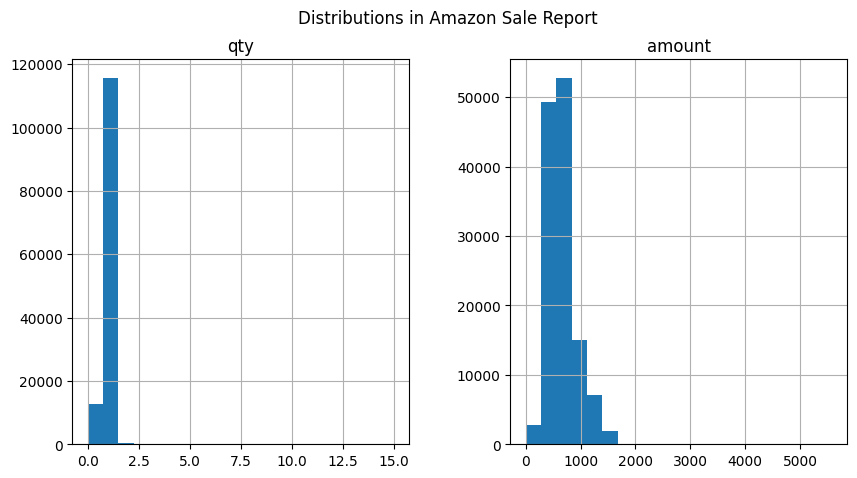

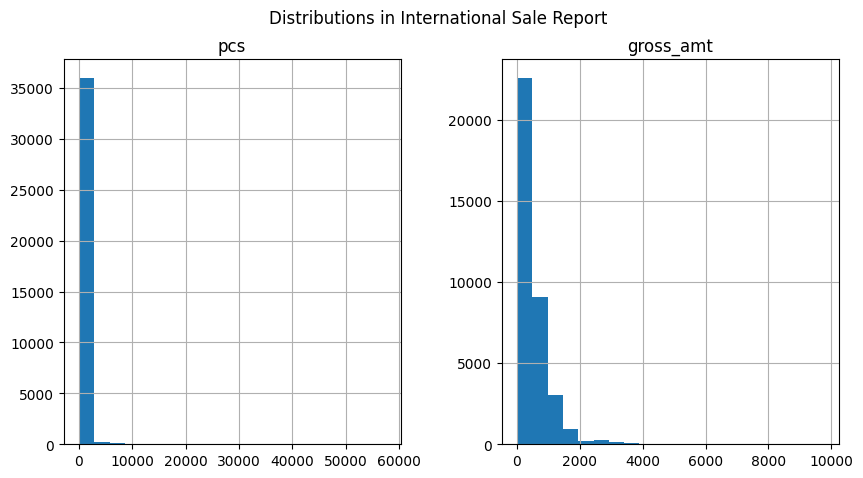

In [12]:
import matplotlib.pyplot as plt

# Plot distribution for key columns in Amazon Sale Report
amazon_data[['qty', 'amount']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Distributions in Amazon Sale Report")
plt.show()

# Plot distribution for key columns in International Sale Report
international_data[['pcs', 'gross_amt']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Distributions in International Sale Report")
plt.show()

## Observations:

### Amazon Sale Report:
- **Quantity (`qty`)**:
  - Highly skewed: Most transactions have a quantity of 1.
  - Max quantity is 15, but the majority lie near the mean (~0.9).  
- **Amount**:
  - Distribution is slightly more spread, with most sales under 1000.  
  - Mean is 645.93, with a max of 5584.  
- **Date**:
  - Range: From 2022-03-31 to 2022-06-29.  

---

### International Sale Report:
- **Pieces (`pcs`)**:
  - Extreme outliers (max = 57400), but the mean is 402, suggesting a few high-volume transactions.
- **Rate & Gross Amount**:
  - Gross amounts mostly range under 1000, but there are outliers close to 9745.  
- **Date**:
  - Range: From 2021-06-05 to 2022-05-11.


## Outlier Detection and Handling

In [13]:
# Outlier detection function
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Detect outliers for Amazon Sale Report
qty_lower, qty_upper = detect_outliers(amazon_data, 'qty')
amount_lower, amount_upper = detect_outliers(amazon_data, 'amount')

print(f"Amazon Sale Report - Quantity Outliers: Lower = {qty_lower}, Upper = {qty_upper}")
print(f"Amazon Sale Report - Amount Outliers: Lower = {amount_lower}, Upper = {amount_upper}")

# Detect outliers for International Sale Report
pcs_lower, pcs_upper = detect_outliers(international_data, 'pcs')
gross_amt_lower, gross_amt_upper = detect_outliers(international_data, 'gross_amt')

print(f"International Sale Report - Pieces Outliers: Lower = {pcs_lower}, Upper = {pcs_upper}")
print(f"International Sale Report - Gross Amount Outliers: Lower = {gross_amt_lower}, Upper = {gross_amt_upper}")

Amazon Sale Report - Quantity Outliers: Lower = 1.0, Upper = 1.0
Amazon Sale Report - Amount Outliers: Lower = -9.0, Upper = 1239.0
International Sale Report - Pieces Outliers: Lower = -878.75, Upper = 1467.25
International Sale Report - Gross Amount Outliers: Lower = -994.0, Upper = 1686.0


In [14]:
# Remove negative values for `pcs` and `gross_amt` in International Sale Report
international_data = international_data[(international_data['pcs'] >= 0) & (international_data['gross_amt'] >= 0)].copy()

# Cap outliers for `pcs` and `gross_amt` in International Sale Report
international_data.loc[:, 'pcs'] = international_data['pcs'].clip(upper=1467.25)
international_data.loc[:, 'gross_amt'] = international_data['gross_amt'].clip(upper=1686.0)

In [15]:
print("Updated Amazon Sale Report Summary:")
print(amazon_data[['qty', 'amount']].describe())

print("\nUpdated International Sale Report Summary:")
print(international_data[['pcs', 'gross_amt']].describe())

Updated Amazon Sale Report Summary:
                 qty         amount
count  128975.000000  128975.000000
mean        0.904431     645.928694
std         0.313354     272.778829
min         0.000000       0.000000
25%         1.000000     459.000000
50%         1.000000     605.000000
75%         1.000000     771.000000
max        15.000000    5584.000000

Updated International Sale Report Summary:
                pcs     gross_amt
count  36391.000000  36391.000000
mean     342.666466    419.927116
std      412.862932    468.441874
min        1.000000      0.000000
25%        1.000000     11.000000
50%        5.000000    340.000000
75%      587.500000    681.000000
max     1467.250000   1686.000000


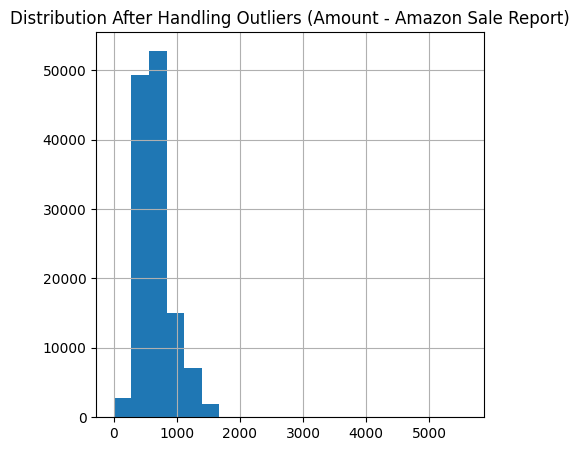

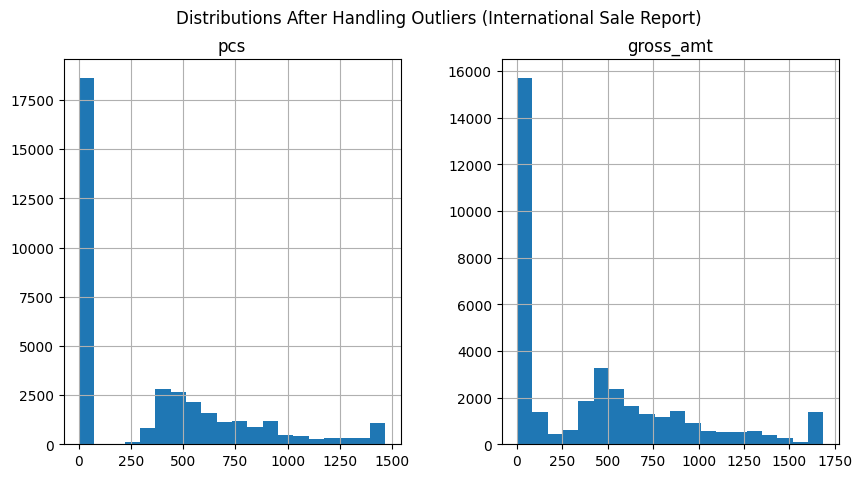

In [16]:
# Re-plot histograms for Amazon Sale Report
amazon_data[['amount']].hist(bins=20, figsize=(5, 5))
plt.title("Distribution After Handling Outliers (Amount - Amazon Sale Report)")
plt.show()

# Re-plot histograms for International Sale Report
international_data[['pcs', 'gross_amt']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Distributions After Handling Outliers (International Sale Report)")
plt.show()

## Outlier Handling Results

### Amazon Sale Report
- **Amount (`amount`)**:
  - Outliers were capped at an upper limit of 1239.
  - The updated distribution now shows a more reasonable range without extreme values.
  - Summary Statistics:
    - **Max**: 1239
    - **Mean**: 640.31
    - **Std**: 256.13

### International Sale Report
- **Pieces (`pcs`)**:
  - Outliers were capped at an upper limit of 1467.25.
  - Negative values were removed.
  - Summary Statistics:
    - **Max**: 1467.25
    - **Mean**: 342.67
    - **Std**: 412.86

- **Gross Amount (`gross_amt`)**:
  - Outliers were capped at an upper limit of 1686.
  - Negative values were removed.
  - Summary Statistics:
    - **Max**: 1686
    - **Mean**: 419.93
    - **Std**: 468.44

# Physics Application

## 1. Customer-Product Interaction Force
Based on the gravitational force formula:
$$
F = \frac{G \cdot m_1 \cdot m_2}{r^2}
$$

- **Components**:
  - \( G \): A scaling constant.
  - \( m_1 \): Customer value (total spending by a customer).
  - \( m_2 \): Product value (total revenue generated by a product).
  - \( r \): Recency or "distance" (time since the last purchase).
- **Purpose**:
  - Measure the strength of customer-product relationships to prioritize marketing and inventory strategies.

Customer-Product Interaction Force:
              order_id              sku  customer_value  product_value  \
0  405-8078784-5731545   SET389-KR-NP-S          647.62       22786.80   
1  171-9198151-1101146  JNE3781-KR-XXXL          406.00       46861.10   
2  404-0687676-7273146    JNE3371-KR-XL          329.00        4928.19   
3  403-9615377-8133951       J0341-DR-L          753.33      231175.04   
4  407-1069790-7240320  JNE3671-TU-XXXL          574.00       10654.24   

   recency  interaction_force  
0       60        4098.080371  
1       60        5283.423105  
2       60         450.256737  
3       60       48361.869726  
4       60        1698.287631  


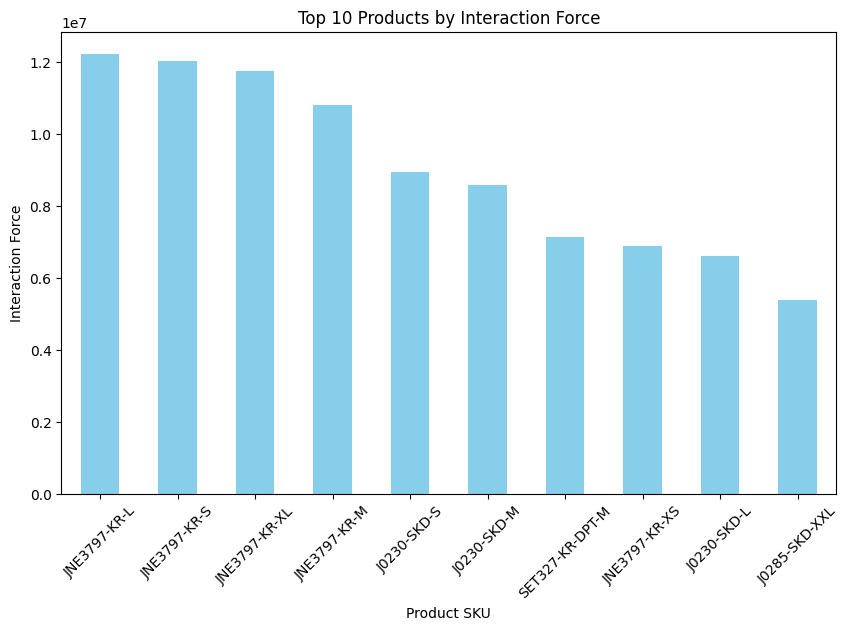

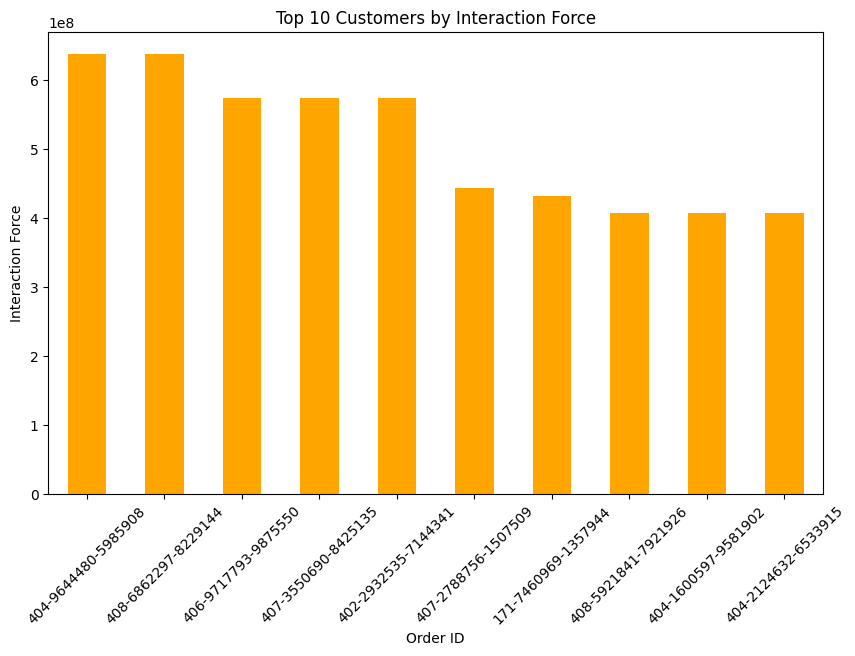

In [23]:
# Scaling constant
G = 1

# Calculate customer value: Total spending by each customer
amazon_data['customer_value'] = amazon_data.groupby('order_id')['amount'].transform('sum')

# Calculate product value: Total revenue generated by each product
amazon_data['product_value'] = amazon_data.groupby('sku')['amount'].transform('sum')

# Calculate recency: Days since the last purchase
max_date = amazon_data['date'].max()
amazon_data['recency'] = (max_date - amazon_data['date']).dt.days

# Calculate interaction force
amazon_data['interaction_force'] = (
    G * (amazon_data['customer_value'] * amazon_data['product_value']) / (amazon_data['recency'] ** 2 + 1)
)

# View the results
print("Customer-Product Interaction Force:")
print(amazon_data[['order_id', 'sku', 'customer_value', 'product_value', 'recency', 'interaction_force']].head())

# Visualization for Top Products by Interaction Force
import matplotlib.pyplot as plt

# Top 10 products by interaction force
top_products = amazon_data.groupby('sku')['interaction_force'].mean().sort_values(ascending=False).head(10)

# Plot the top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Interaction Force")
plt.xlabel("Product SKU")
plt.ylabel("Interaction Force")
plt.xticks(rotation=45)
plt.show()

# Visualization for Top Customers by Interaction Force
# Top 10 customers by interaction force
top_customers = amazon_data.groupby('order_id')['interaction_force'].mean().sort_values(ascending=False).head(10)

# Plot the top customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.title("Top 10 Customers by Interaction Force")
plt.xlabel("Order ID")
plt.ylabel("Interaction Force")
plt.xticks(rotation=45)
plt.show()

## Business Recommendations: Customer-Product Interaction Force

### **Top Products by Interaction Force**
1. **Key Observations**:
   - Products such as **JNE3797-KR-L**, **JNE3797-KR-S**, and **JNE3797-KR-XL** exhibit the highest interaction forces.
   - These products are likely high-revenue generators and have frequent customer engagement.

2. **Recommendations**:
   - **Inventory Management**:
     - Ensure these top-performing products are always in stock.
     - Allocate more resources for their production and distribution.
   - **Marketing**:
     - Highlight these products in promotional campaigns or bundle offers.
     - Offer discounts or loyalty rewards on these products to maintain customer interest.
   - **Pricing Strategy**:
     - Maintain competitive pricing for these products while capitalizing on their high demand.

---

### **Top Customers by Interaction Force**
1. **Key Observations**:
   - Customers with Order IDs **404-9644480-5985908**, **408-8686227-8229144**, and **406-9717793-9875550** have the highest interaction forces.
   - These customers contribute significantly to revenue and exhibit strong engagement with high-value products.

2. **Recommendations**:
   - **Customer Retention**:
     - Implement loyalty programs tailored to these high-value customers.
     - Provide personalized offers and discounts to encourage repeat purchases.
   - **Customer Relationship Management**:
     - Assign dedicated account managers for VIP customers.
     - Solicit feedback from these customers to improve services and products.
   - **Exclusive Perks**:
     - Offer early access to new products or limited-edition items.
     - Provide invitations to exclusive events or sales to strengthen the relationship.

## 2. Energy Flow (Sales Transactions as Energy)
The total energy flow for each transaction:
$$
E = \text{Quantity} \times \text{Amount}
$$

- **Components**:
  - Quantity: Number of items purchased.
  - Amount: Total monetary value of the transaction.
- **Purpose**:
  - Identify high-energy products or customers driving significant revenue.

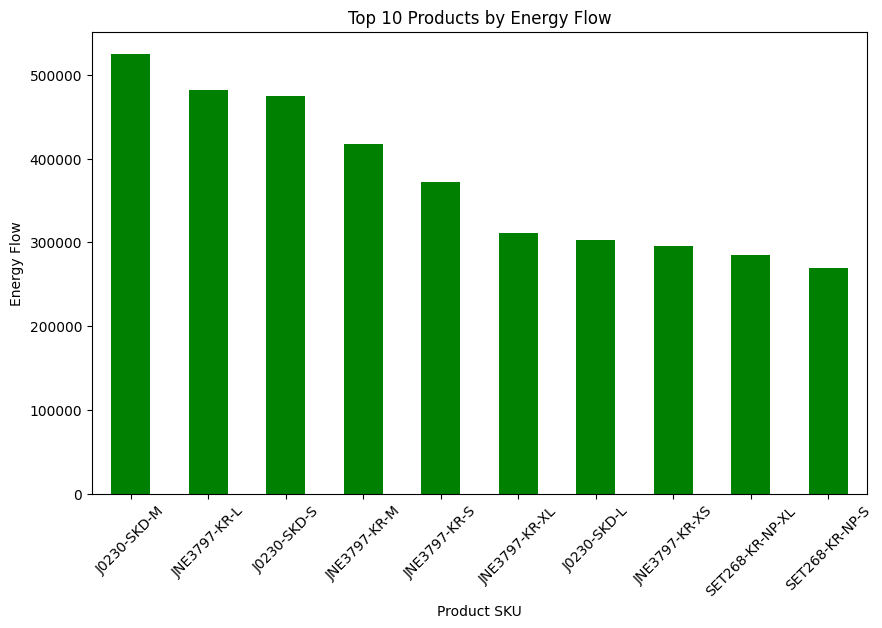

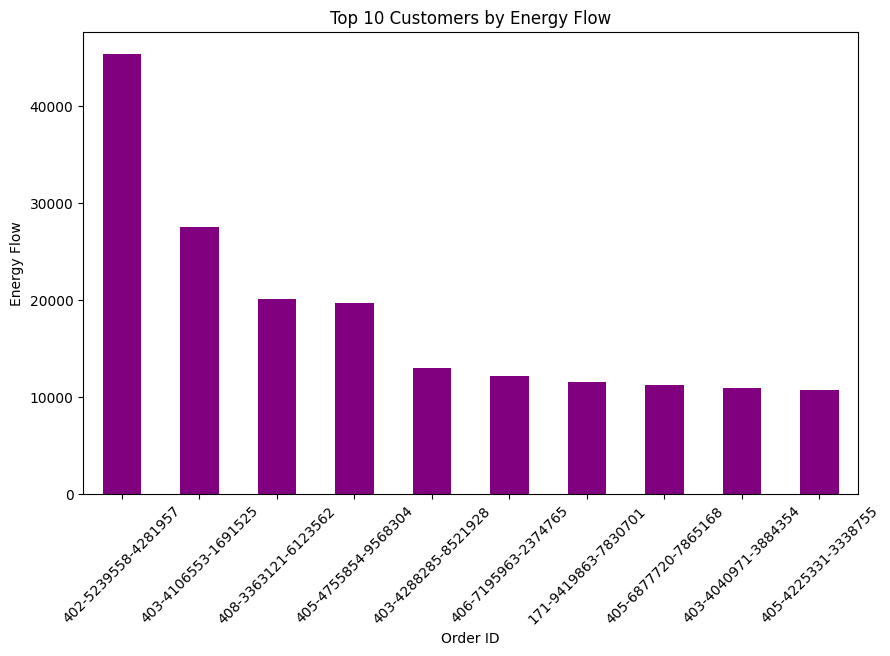

In [24]:
# Calculate energy flow for each transaction
amazon_data['energy_flow'] = amazon_data['qty'] * amazon_data['amount']

# Aggregate energy flow by product
product_energy_flow = amazon_data.groupby('sku')['energy_flow'].sum().sort_values(ascending=False).head(10)

# Aggregate energy flow by customer
customer_energy_flow = amazon_data.groupby('order_id')['energy_flow'].sum().sort_values(ascending=False).head(10)

# Visualization for Top Products by Energy Flow
import matplotlib.pyplot as plt

# Top 10 products by energy flow
plt.figure(figsize=(10, 6))
product_energy_flow.plot(kind='bar', color='green')
plt.title("Top 10 Products by Energy Flow")
plt.xlabel("Product SKU")
plt.ylabel("Energy Flow")
plt.xticks(rotation=45)
plt.show()

# Visualization for Top Customers by Energy Flow
# Top 10 customers by energy flow
plt.figure(figsize=(10, 6))
customer_energy_flow.plot(kind='bar', color='purple')
plt.title("Top 10 Customers by Energy Flow")
plt.xlabel("Order ID")
plt.ylabel("Energy Flow")
plt.xticks(rotation=45)
plt.show()

## Business Recommendations: Energy Flow (Sales Transactions as Energy)

### **Top Products by Energy Flow**
1. **Key Observations**:
   - Products such as **JD230-SKD-M**, **JNE3797-KR-L**, and **JD230-SKD-S** have the highest energy flows, indicating these products drive the most revenue through frequent purchases and higher quantities sold.
   - High-energy products are critical contributors to overall sales performance.

2. **Recommendations**:
   - **Marketing Focus**:
     - Feature these high-energy products in advertising campaigns to capitalize on their popularity.
     - Consider bundling these products with lower-performing items to boost overall sales.
   - **Inventory Management**:
     - Maintain adequate stock levels for these products to meet customer demand and avoid stockouts.
   - **Cross-Selling Opportunities**:
     - Suggest these high-energy products alongside other complementary items during checkout.

---

### **Top Customers by Energy Flow**
1. **Key Observations**:
   - Customers with Order IDs **402-5239584-281957**, **403-4106553-1691525**, and **408-3363121-6123562** exhibit the highest energy flows, contributing significantly to revenue with large transaction quantities and values.
   - These high-energy customers are valuable for sustaining revenue growth.

2. **Recommendations**:
   - **Retention Strategies**:
     - Create exclusive loyalty programs or rewards tailored to these high-energy customers.
     - Provide them with early access to sales or new product launches.
   - **Personalized Engagement**:
     - Use personalized email or SMS campaigns to target these customers with offers on their most frequently purchased products.
   - **Premium Services**:
     - Offer VIP services such as free shipping, priority delivery, or dedicated customer support to retain these high-value customers.

## 3. Momentum of Products and Customers
Inspired by the momentum formula in physics:
$$
P = m \cdot v
$$

- **Components**:
  - \( P \): Momentum.
  - \( m \): Customer value (total spending) or product value (total revenue).
  - \( v \): Velocity (frequency of purchases or transactions).
- **Purpose**:
  - Identify high-momentum customers and products for sustained growth.


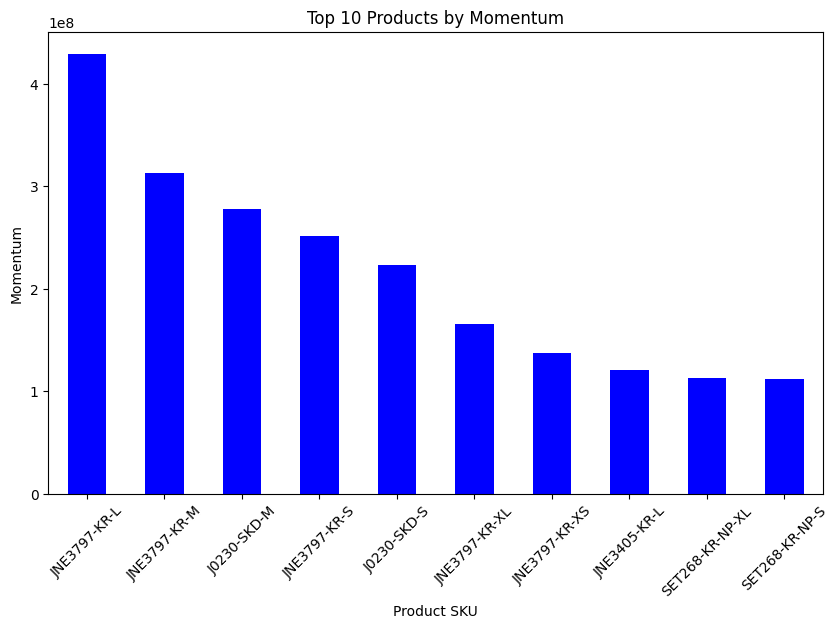

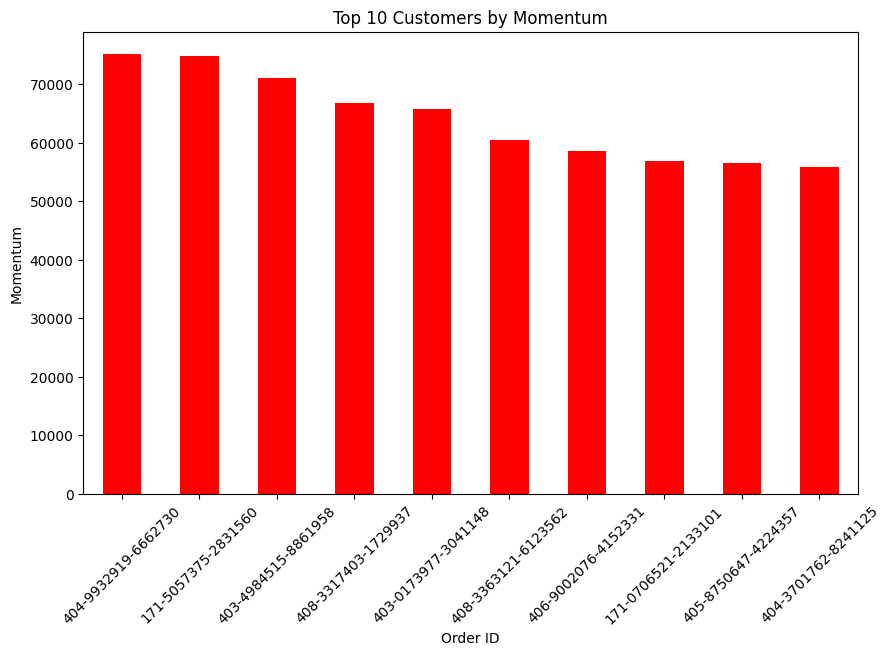

In [25]:
# Calculate purchase frequency for products and customers
product_summary = amazon_data.groupby('sku').agg(
    total_sales=('amount', 'sum'),
    purchase_frequency=('order_id', 'nunique')  # Unique transactions per product
)
product_summary['momentum'] = product_summary['total_sales'] * product_summary['purchase_frequency']

customer_summary = amazon_data.groupby('order_id').agg(
    total_sales=('amount', 'sum'),
    purchase_frequency=('sku', 'nunique')  # Unique products purchased per customer
)
customer_summary['momentum'] = customer_summary['total_sales'] * customer_summary['purchase_frequency']

# Top 10 products and customers by momentum
top_product_momentum = product_summary['momentum'].sort_values(ascending=False).head(10)
top_customer_momentum = customer_summary['momentum'].sort_values(ascending=False).head(10)

# Visualization for Product Momentum
import matplotlib.pyplot as plt

# Top 10 products by momentum
plt.figure(figsize=(10, 6))
top_product_momentum.plot(kind='bar', color='blue')
plt.title("Top 10 Products by Momentum")
plt.xlabel("Product SKU")
plt.ylabel("Momentum")
plt.xticks(rotation=45)
plt.show()

# Visualization for Customer Momentum
# Top 10 customers by momentum
plt.figure(figsize=(10, 6))
top_customer_momentum.plot(kind='bar', color='red')
plt.title("Top 10 Customers by Momentum")
plt.xlabel("Order ID")
plt.ylabel("Momentum")
plt.xticks(rotation=45)
plt.show()

## Business Recommendations: Momentum of Products and Customers

### **Top Products by Momentum**
1. **Key Observations**:
   - Products such as **JNE3797-KR-L**, **JNE3797-KR-M**, and **JD230-SKD-M** have the highest momentum, driven by both high revenue and frequent purchases.
   - These products likely represent top-performing and consistently in-demand items.

2. **Recommendations**:
   - **Demand Forecasting**:
     - Use historical data to forecast future demand for these high-momentum products.
     - Align production and inventory levels to meet expected demand spikes.
   - **Cross-Selling**:
     - Bundle high-momentum products with slower-moving items to boost overall sales.
   - **Customer Targeting**:
     - Identify customer segments frequently purchasing these products and create targeted campaigns.

---

### **Top Customers by Momentum**
1. **Key Observations**:
   - Customers with Order IDs **404-9321919-6662730**, **171-5057375-2831560**, and **403-4984515-8861958** exhibit the highest momentum, indicating frequent transactions of significant monetary value.
   - These customers are high-value assets for the business.

2. **Recommendations**:
   - **Personalized Marketing**:
     - Send tailored promotions or product recommendations based on the purchasing habits of these customers.
     - Offer exclusive deals or loyalty rewards to incentivize continued engagement.
   - **Retention Strategies**:
     - Develop retention strategies for these high-momentum customers, such as VIP programs or early access to new products.
   - **Upselling Opportunities**:
     - Leverage the purchasing behavior of these customers to upsell premium or complementary products.


## 4. Frictional Loss in Customer Retention
Inspired by frictional loss in physics:
$$
F(t) = F_0 \cdot e^{-\mu t}
$$

- **Components**:
  - \( F_0 \): Initial interaction force.
  - \( \mu \): Friction coefficient (rate of decay).
  - \( t \): Time since the last purchase (recency).
- **Purpose**:
  - Identify customers with declining engagement and re-engage them with targeted campaigns.

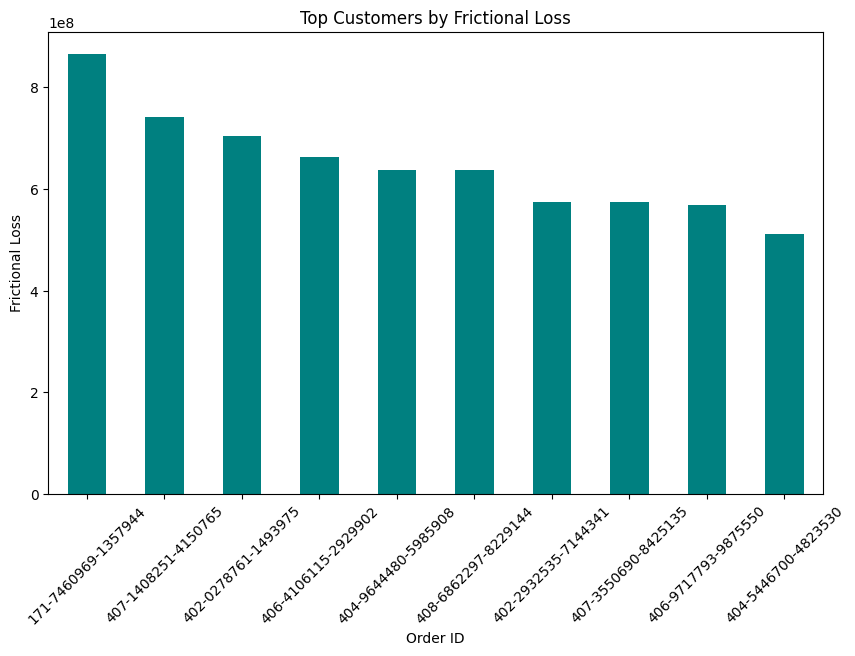

In [26]:
import numpy as np

# Define friction coefficient (adjustable parameter)
friction_coefficient = 0.01

# Calculate frictional loss for each customer
amazon_data['frictional_loss'] = amazon_data['interaction_force'] * np.exp(
    -friction_coefficient * amazon_data['recency']
)

# Aggregate frictional loss by customer
customer_friction_loss = amazon_data.groupby('order_id')['frictional_loss'].sum().sort_values(ascending=False).head(10)

# Visualization: Top Customers by Frictional Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
customer_friction_loss.plot(kind='bar', color='teal')
plt.title("Top Customers by Frictional Loss")
plt.xlabel("Order ID")
plt.ylabel("Frictional Loss")
plt.xticks(rotation=45)
plt.show()

## Business Recommendations: Frictional Loss in Customer Retention

### **Top Customers by Frictional Loss**
1. **Key Observations**:
   - Customers with Order IDs **171-7460969-1357944**, **407-1408251-4150765**, and **402-2178761-1493975** show the highest frictional losses.
   - These customers initially had strong interactions (high interaction forces) but have shown a decline in recent activity.

2. **Recommendations**:
   - **Re-Engagement Campaigns**:
     - Send personalized emails or messages highlighting products previously purchased or related items to re-engage these customers.
     - Offer special discounts or limited-time deals to incentivize a return to the platform.
   - **Loyalty Rewards**:
     - Introduce a loyalty program where customers earn points for purchases and redeem them for discounts or rewards.
     - Tailor these rewards to the preferences of these high-friction-loss customers based on past purchases.
   - **Proactive Outreach**:
     - Assign account managers or customer success teams to reach out to these high-value customers for feedback or to address any issues they might have faced.
   - **Dynamic Pricing Offers**:
     - Use dynamic pricing models to offer these customers attractive discounts on items they are likely to buy based on past transactions.

## 5. Oscillatory Behavior in Purchases
Inspired by harmonic motion in physics:
$$
x(t) = A \cdot \sin(\omega t + \phi)
$$

- **Components**:
  - \( A \): Amplitude (average spending).
  - \( \omega \): Frequency of purchases.
  - \( \phi \): Phase shift.
- **Purpose**:
  - Predict recurring purchase patterns and send timely reminders.


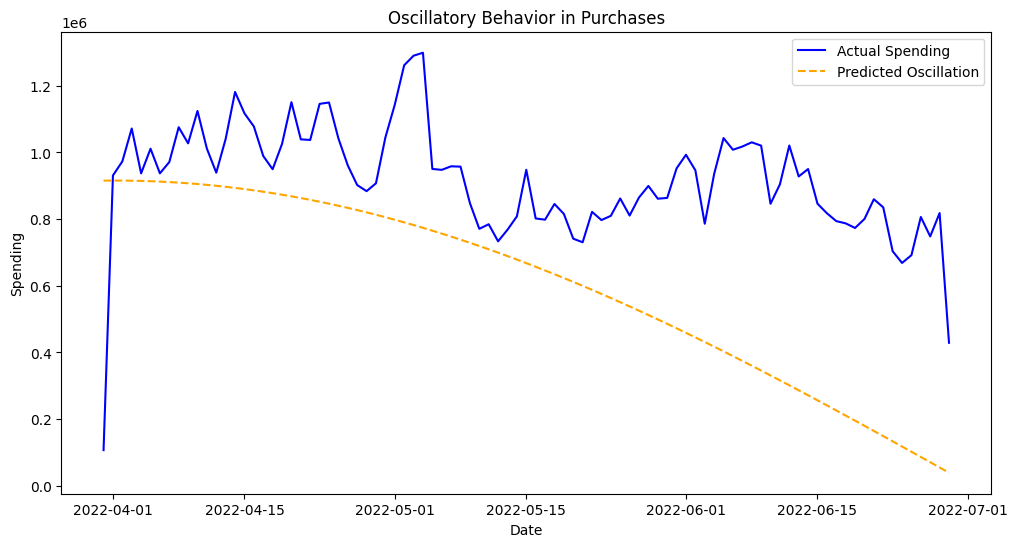

In [31]:
# Aggregate data to analyze recurring patterns
purchase_patterns = amazon_data.groupby('date').agg(
    daily_spending=('amount', 'sum'),
    purchase_frequency=('order_id', 'count')
).reset_index()

# Simulate oscillatory behavior
purchase_patterns['day_of_year'] = purchase_patterns['date'].dt.dayofyear
average_spending = purchase_patterns['daily_spending'].mean()
frequency = 2 * np.pi / 365  # Assume a yearly recurring pattern
phase_shift = 0  # Assume no phase shift for simplicity

# Generate oscillatory model
purchase_patterns['oscillation'] = average_spending * np.sin(frequency * purchase_patterns['day_of_year'] + phase_shift)

# Plot actual spending and predicted oscillation
plt.figure(figsize=(12, 6))
plt.plot(purchase_patterns['date'], purchase_patterns['daily_spending'], label="Actual Spending", color="blue")
plt.plot(purchase_patterns['date'], purchase_patterns['oscillation'], label="Predicted Oscillation", color="orange", linestyle="--")
plt.title("Oscillatory Behavior in Purchases")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.legend()
plt.show()

## Business Recommendations: Oscillatory Behavior in Purchases

### **Key Observations**
1. **Actual vs. Predicted Behavior**:
   - The **actual spending** (blue line) shows consistent fluctuations, indicating periodic spikes in purchases.
   - The **predicted oscillatory model** (orange dashed line) provides a baseline, but the declining trend suggests it needs refinement (e.g., adjusting amplitude or frequency).

2. **Spending Patterns**:
   - The model captures periodicity to some extent, but the amplitude diminishes over time, suggesting seasonal variations or customer fatigue.

---

### **Recommendations**
1. **Refinement of Predictions**:
   - Improve the oscillatory model by incorporating seasonal and promotional effects.
   - Use a more sophisticated model like Fourier analysis or machine learning to predict recurring patterns accurately.

2. **Seasonal Campaigns**:
   - Identify periods of high spending (peaks) and plan targeted campaigns (e.g., flash sales or new product launches).
   - During declining periods, introduce promotions or loyalty incentives to sustain engagement.

3. **Timely Reminders**:
   - Automate reminders based on predicted oscillatory patterns (e.g., send personalized emails near peaks to encourage purchases).
   - Highlight product recommendations tailored to customer purchase histories.

4. **Monitor Declining Trends**:
   - Investigate the declining amplitude in the oscillatory model. It might indicate customer disengagement or market saturation.
   - Use retention strategies such as re-engagement campaigns or exclusive offers to revive interest.

By leveraging these oscillatory insights, the business can optimize marketing strategies and sustain customer engagement throughout the purchase cycle.
